In [1]:
import numpy as np
import numpy.linalg as npl
import math
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# 9.3 Epidemic Dynamics

**Simple SIR Model - Activity ONE**

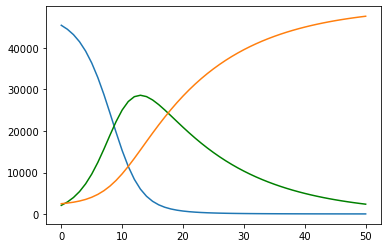

In [2]:

#Use Pseudocode from Calculus in Context, Chapter 2 page 69 to plot the 3 functions S, I and R. Use a (.00001)and b (14) as varibles instead of numbers
#Use a fixed plot window with y as the total height and fix the number of days you want to explore.
#Once it is working, add a new rate equation for Deaths by splitting up the "Recovered" 2 equations - for example 10 percent pass to death and 90 percent pass to recovered.
#Please comment your code.

#CODE HERE

'''Modeling off of the Calculus in Context numbers (p. 61) and pseudocode (p. 69)'''

''' 
t_initial and t_final is a measurement of stepping between time points. These could be days, weeks, months. It's important to understand context when analyzing this data.
For t_initial = 0 and t_final = 3, our time points measure S, I, and R across 3 days.''' 
numberofsteps = 50 # number of data segments to keep track of. I.e. number of times to loop through status change steps.
t_initial = 0
t_final = 50
Delta_t = (t_final - t_initial)/numberofsteps
t = t_initial


a = 0.00001 # this is the coefficient for our S_prime equation. It is a measure of 'contagiousness' of the infection given a susceptible person making contact with an infected one.
b = 14      # this is the coefficient for the R_prime equation. This is the number of days required for the infection to clear. We are assuming you are not contagious afterwards.

S = 45400 # total susceptible people in population
I = 2100  # total people currently infected
R = 2500  # total currently recovered


''' Initialize lists to then plot below, appending each new respective value in the loop '''

S_list = [S]
I_list = [I]
R_list = [R]
t_list = [t]

'''We design a for loop that repeats for a number of segments. We iterate over 3 steps with each loop:
Step 1: We establish the rate change equations: S_prime, I_prime, R_prime.
'''

for step in range(numberofsteps): # we loop for the number of segments we wish to record
    S_prime = -a * S * I # the number of susceptible people decreases as they succumb to infection. S_Prime is a measure of this change
    I_prime = a*S*I - I/b # the number of infected persons increases as more susceptible people become infected, and decreases as they recover (or die).
    R_prime = I/b # the number of recovered persons increases as the infection clears.
    
    ''' Step 2: Designing the for Loop, and calculating the changes in S, I, R as Delta_S, Delta_I, Delta_R, respectively.'''
    Delta_S = S_prime * Delta_t # Calculate the change in S, I, and R from their rates of change.
    Delta_I = I_prime * Delta_t
    Delta_R = R_prime * Delta_t

    

    ''' Step 3: Construct the changes in S, I, and R from their Deltas.'''
    S = S + Delta_S
    I = I + Delta_I
    R = R + Delta_R
    t = t + Delta_t # Don't forget to calculate the change in time
    S_list.append(S) # We then append to arrays to be plotted.
    I_list.append(I)
    R_list.append(R)
    t_list.append(t)

   


#Shortest Mathpllib tutorial ever.
#Just use this - you need to array the data each time as below - but really you don't need all the bells and whistles.

import matplotlib.pyplot as plt
plt.plot(t_list, S_list) 

plt.plot(t_list, I_list, 'g')

plt.plot(t_list, R_list)



**Question 1:**
Test your model with a = .00001 and b = 10 over 50 days and check with the given textbook. Show the output. Provide simple context for this model with comments or text.


**Q1 Answer**

    *a* represents a transmission coefficient that measures not only the average potential to come in contact with an infected person, but also a probability for a susceptible person to become infected as a result of making contact.

    *b* is a recovery coefficient indicating the number of days it takes to clear the infection.

    a = 0.00001 is a fairly standard rate of contact and subsequent infection between susceptible and contagious individuals (1 infection per 10,000 contacts between susceptible and infection). However, once these infections occur, they take b = 10 days to clear. The weight of transitioning the susceptible population to infectious is carried by the increasing number of infected individuals around decreasing susceptible ones. We see the suceptible population line (blue) rapidly decrease until it levels off to 0 at ~Day 21. Our model also assumes that once infected, you cannot reacquire infection. So the most infected individuals we see in a day is at ~Day 12, before the number of infected individuals begins to decrease. This makes sense, as there are fewer susceptible individuals to infect, and now more infected individuals are clearing the infection than are becoming infected. 

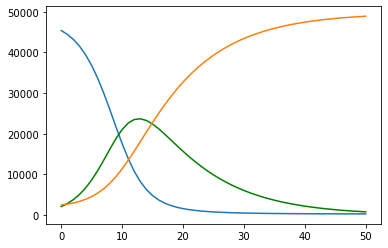

In [3]:
''' Question 1 Answer CODE'''


''' Question 1: Change a = 0.00001 and b=10 and t_final = 50 '''

numberofsteps = 50 # number of data segments to keep track of. I.e. number of times to loop through status change steps.
t_initial = 0
t_final = 50
Delta_t = (t_final - t_initial)/numberofsteps
t = t_initial
a = 0.00001 # this is the coefficient for our S_prime equation. It is a measure of 'contagiousness' of the infection given a susceptible person making contact with an infected one.
b = 10      # this is the coefficient for the R_prime equation. This is the number of days required for the infection to clear. We are assuming you are not contagious afterwards.

S = 45400 # total susceptible people in population
I = 2100  # total people currently infected
R = 2500  # total currently recovered

S_list = [S]
I_list = [I]
R_list = [R]
t_list = [t]

for step in range(numberofsteps): # we loop for the number of segments we wish to record
    S_prime = -a * S * I # the number of susceptible people decreases as they succumb to infection. S_Prime is a measure of this change
    I_prime = a*S*I - I/b # the number of infected persons increases as more susceptible people become infected, and decreases as they recover (or die).
    R_prime = I/b # the number of recovered persons increases as the infection clears.
    
    ''' Step 2: Designing the for Loop, and calculating the changes in S, I, R as Delta_S, Delta_I, Delta_R, respectively.'''
    Delta_S = S_prime * Delta_t # Calculate the change in S, I, and R from their rates of change.
    Delta_I = I_prime * Delta_t
    Delta_R = R_prime * Delta_t

    

    ''' Step 3: Construct the changes in S, I, and R from their Deltas.'''
    S = S + Delta_S
    I = I + Delta_I
    R = R + Delta_R
    t = t + Delta_t # Don't forget to calculate the change in time
    S_list.append(S)
    I_list.append(I)
    R_list.append(R)
    t_list.append(t)
    
plt.plot(t_list, S_list) #blue line

plt.plot(t_list, I_list, 'g') #green line

plt.plot(t_list, R_list) #orange line


**Question 2:** Using your SIRPLOT code above, explore what happens when you change the length of time a deisease takes to recover (which may happen with a new medicine for example). Provide examples from your model in code blocks and context and explanation in textblocks.



**Q2 Answer**

    When we introduce a medicine to shorten the length of time an infection persists, we are altering the *b* coefficient, which dictates the length of time to recover from the infection.

    By introducing medicine/a vaccine, we are shortening the length of time an infected individual remains infected and subsequently moving them to the recovered phase. We can effectively "flatten the curve", meaning we are lessening the number of infected individuals on any given day over time. 

    Remarkably, we also don't infect all of our susceptible population. By shortening the infection time, people in the infection stage recover more quickly and move to the recovered stage, lessening the number of infected people that can come in contact with the susceptible population.

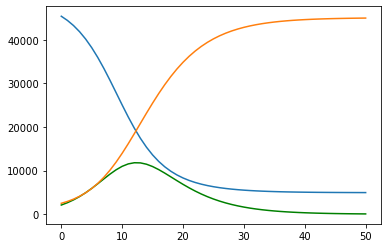

In [4]:
''' Question 2 Answer CODE'''


''' Question 2: Change b to shorten the length of time for infection '''

numberofsteps = 50 # number of data segments to keep track of. I.e. number of times to loop through status change steps.
t_initial = 0
t_final = 50
Delta_t = (t_final - t_initial)/numberofsteps
t = t_initial
a = 0.00001 
b = 5      
''' To simulate clearing the infection more quickly, we can lessen the number of days it takes to clear the infection. 
Let's say by introducing medicine (Tamiflu, or an antibiotic, etc) we cut the time of infection down from 10 days to 5 days.
So, b = 10 becomes b = 5'''

S = 45400 
I = 2100  
R = 2500  

S_list = [S]
I_list = [I]
R_list = [R]
t_list = [t]

for step in range(numberofsteps): # we loop for the number of segments we wish to record
    S_prime = -a * S * I # the number of susceptible people decreases as they succumb to infection. S_Prime is a measure of this change
    I_prime = a*S*I - I/b # the number of infected persons increases as more susceptible people become infected, and decreases as they recover (or die).
    R_prime = I/b # the number of recovered persons increases as the infection clears.
    
    ''' Step 2: Designing the for Loop, and calculating the changes in S, I, R as Delta_S, Delta_I, Delta_R, respectively.'''
    Delta_S = S_prime * Delta_t # Calculate the change in S, I, and R from their rates of change.
    Delta_I = I_prime * Delta_t
    Delta_R = R_prime * Delta_t

    

    ''' Step 3: Construct the changes in S, I, and R from their Deltas.'''
    S = S + Delta_S
    I = I + Delta_I
    R = R + Delta_R
    t = t + Delta_t # Don't forget to calculate the change in time
    S_list.append(S)
    I_list.append(I)
    R_list.append(R)
    t_list.append(t)
    
plt.plot(t_list, S_list) #blue line

plt.plot(t_list, I_list, 'g') #green line

plt.plot(t_list, R_list) #orange line


**Question 3:** Using your SIRPLOT code above, explore what happens to the course of a disease when you change the transmission coeffient a (which happens if people self-isolate for example). Provide examples from your model in code blocks and context and explanation in textblocks.

**Q3 Answer**

    When individuals self-isolate, assuming they all cooperate, we reduce the amount of contact between infected individuals and the susceptible population, thus we are reducing the *a* coefficient. While this doesn't shorten the length of infection time, it still flattens the curve considerably by reducing the number of people becoming infected at a given time. 

    Again, we also don't infect all of our susceptible population. By reducing contact, we reduce the amount of opportunities the infection is transmitted, giving infected people time to recover and lessening the number of infected people that can transmit.

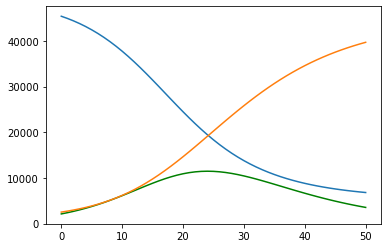

In [5]:
''' Question 3 Answer CODE'''


''' Question 3: Change the transmission coefficient a to simulate reduced contact opportunities between S and I individuals (i.e. quarantining) '''

numberofsteps = 50 # number of data segments to keep track of. I.e. number of times to loop through status change steps.
t_initial = 0
t_final = 50
Delta_t = (t_final - t_initial)/numberofsteps
t = t_initial
a = 0.000005 
b = 10      
''' To simulate quarantining, we can lessen the transmission coefficient to simulate reducing the number of contact opportunities. 
This way, we can consider cutting the number of infected individuals susceptible people would be coming in contact with.
So, a = 0.000010 becomes a = 0.000005'''

S = 45400 
I = 2100  
R = 2500  

S_list = [S]
I_list = [I]
R_list = [R]
t_list = [t]

for step in range(numberofsteps): # we loop for the number of segments we wish to record
    S_prime = -a * S * I # the number of susceptible people decreases as they succumb to infection. S_Prime is a measure of this change
    I_prime = a*S*I - I/b # the number of infected persons increases as more susceptible people become infected, and decreases as they recover (or die).
    R_prime = I/b # the number of recovered persons increases as the infection clears.
    
    ''' Step 2: Designing the for Loop, and calculating the changes in S, I, R as Delta_S, Delta_I, Delta_R, respectively.'''
    Delta_S = S_prime * Delta_t # Calculate the change in S, I, and R from their rates of change.
    Delta_I = I_prime * Delta_t
    Delta_R = R_prime * Delta_t

    

    ''' Step 3: Construct the changes in S, I, and R from their Deltas.'''
    S = S + Delta_S
    I = I + Delta_I
    R = R + Delta_R
    t = t + Delta_t # Don't forget to calculate the change in time
    S_list.append(S)
    I_list.append(I)
    R_list.append(R)
    t_list.append(t)
    
plt.plot(t_list, S_list) #blue line

plt.plot(t_list, I_list, 'g') #green line

plt.plot(t_list, R_list) #orange line


**SIR with Differential Equations**

**Question 4:**
Look at the following implementation of SIR (adapted from the https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/) using differential equations. 

How is it the same and how is it different to SIRPLOT? Answer here with code and text examples.

**Q4 Answer**

    Same: Differential equations are still determined using the same coefficients and SIR variables. This model uses many of the same features as the SIRPLOT model, with the exception of using a for loop to append values into arrays to be plotted. Instead, it uses packaged code to discern these arrays.

    Different: The susceptible equation (a*S*I) is divided by the total population, N. 
    Instead of all infected persons becoming recovered (and presumably immune), this model also incorporates a death toll.
    This model also begins to find proportions of the population within each stage of the SIRD model.
    
**Question 5:**
Can you use this model to explore the Questions 2 and 3 above. Answer here.

**Q5 Answer**

    You can, questions 2 and 3 ask to change *a* and *b* which are the transmission and recovery coefficients, respectively. These are available in the differential equation code below.

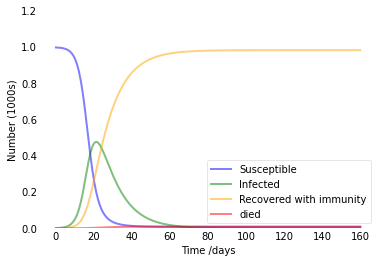

In [6]:


#Using Differential Equations


# Total population, N.
N = 1000

timeperiod =160
# Initial number of infected and recovered individuals, I0 and R0.
I0=1
R0 =1
# Everyone else, S0, is suscepti5ble to infection initially.
S0 = N - I0 - R0

D0 =0


#TRY modifying a and b

# Contact rate, a, and mean recovery rate, b, (in 1/days).

days=10 #(days to recover - how long are the infected able to pass it on )

a=.0005 #(more contact, how quickly it spreads)

b=1/days 

deathrate = .01
recover = 1 - deathrate





# A grid of time points (in days)
t = np.linspace(0, 160, timeperiod)

# The SIR model differential equations.
def deriv(y, t, N, a, b):
    S, I, R, D = y
    dSdt = -a * S * I 
    dIdt = a * S * I  - b * I
    dRdt = recover * (b * I)
    dDrt = deathrate * (b * I) 
    return dSdt, dIdt, dRdt, dDrt

# Initial conditions vector
y0 = S0, I0, R0, D0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, a, b))
S, I, R, D = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
#ax = fig.add_subplot(111, axis_bgcolor='#dddddd', axisbelow=True)
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'g', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'orange', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(t, D/1000, 'r', alpha=0.5, lw=2, label='died')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

**SIR with Matrices**

**Question 6:**
How is this implementation the same and different than SIRPLOT and the differential equation SIRmodel? Can you explore changes in the transmission coefficent and recovery rate the same way?  

**Q6 Answer**

    Same: In this model, we are looking again at proportions of the population that fall into 4 categories and how they move between them.

    Different: We don't establish base numbers of a population and instead estimate based on percentages of the population present within each category. 
    The appropriate entries in the A matrix model are these percentages that simulate moving group members to different stages.
    In this model, the infection population moving out of infection status is split three ways, moving into one of recovered with immunity, dead, or back to susceptible/recovery w/o immunity.
    This model also isn't worried about an initial and final T, and instead plots all T points one at a time as the for loop iterates.
    This model does not use differentiation equations, and instead opts to hardcode values to influence 



**Question 7:**
What are the advantages and disadvantages of this matrix model?

**Q7 Answer**

    Advantage: Code is more succinct than the other two.

    Disadvantage: Just like with the other models, this model is merely an estimate because our coefficients *a* and *b* do not change over time. In the context of this model, our ratios altering group members are static and do not change.
    Another (perhaps minor) disadvantage to this code is the readability, if a future reader is unfamiliar with the package functions. 

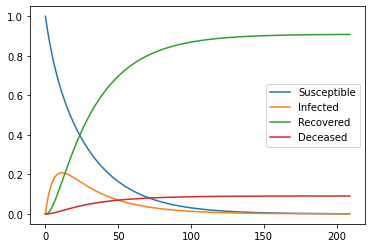

In [7]:


T  = 210 #number of days
a= .05         # % new infection each day
aS= 1 - a      # % remain suseptible
rnI= .04       # recover no immunity
rI= .1         # recover with immunity
rD= .01        # die from disease


A = np.matrix([[aS,rnI,0,0],[rnI+rD,(1-(rnI +rI + rD)) ,0,0],[0,rI,1,0],[0,rD,0,1]]) #dynamics matrix
x1 = np.array([1,0,0,0]) #initial state: everyone healthy
stateTraj = np.hstack([np.vstack(x1),np.zeros((4,T-1))]) #initialize trajectory with 0s
for t in range(T-1):
    stateTraj[:,t+1] = np.matmul(A,stateTraj[:,t])

for i in range(len(stateTraj)):
    plt.plot(range(T),stateTraj[i])

plt.legend(["Susceptible","Infected","Recovered","Deceased"])

**Question 8:**
Calculus in Context, Chapter 4, explores additional models that can be explored using this method. 
Copy and paste SIR plot here and  modify to model the Lotka-Voerra Model from page 193 number 7. Answer a - f. 
!!!! for c use c = .0024 not .00004.

**Q8 Answer**

    8a) This model assumes growth is unbounded and does not make use of the logistic growth term for bounded growth. Other terms in the model assumes the population of each organism grows and dies in proportion to the other (*b* and *c* terms) as well as proportionally within their own groups (*a* and *d* terms).

    8b) H' and L' are the rate equations for the change in the number of hares and lynxes over a period of time. The units output by these equations are values in units "hares per month" and "lynxes per month", respectively. The coefficients in these equations must have units that balance these equations. For H', we are yielding values with units "hares per month". *a* is in units "hares per month per hare" because when multiplied by the number of hares that particular month, we effectively "cancel" units to yield the units "hares per month." The same logic is used for the *b* coefficient. When multiplying by the number of hares and lynxes, the interaction coefficient *b* must have "hare-lynx" units in the denominator to cancel the term.
    Since L' yields the number of "lynxes per month", the terms in this equation must also be in units of "lynxes per month". *c* is in units "lynxes per month per hare-lynx" as we multiply the interactions between hares and lynxes, and then *d* is in "lynxes per month per lynx".

    8c) (Graph of 7c diagrammed below) The populations oscillate. As the hare population grows, the lynx population also begins to grow, which makes sense as there are more interactions that occur between hares, and perhaps fewer between hares and lynxes as the lynx population is still small. The hare population begins to fall first while lynxes continue to rise because there are now a peak number of hares, and with a growing lynx population, more interactions are occurring, so we still expect lynxes to continue growing as they feed off of the hare population. Finally, because of there being fewer hares in population, lynxes begin to fall off as well due to the lack of hares to feed on, so the lynx population begins to die off as well now. Because of this, we see hares are now more capable of reproducing, and we begin to see the hare population rise once more. 

    8d) Populations still oscillate in similar fashion between a range of values that are controlled by each other's respective populations. However, it appears that the maximums and minimum population ranges change for each period for both populations given different starting populations of lynxes.

    8e) Yes the lynx and har populations have the same length of time periods for their osscilations. ~100 months for both.

    8f) There are still periods of oscillation, but the rates at which populations grow or decline is unequal. For example, in L(0) = 20, they rate of population increase for hares is nearly the same as the rate of decrease for their decline after they hit their peak. However, when L(0) = 50, after reaching peak population, hares will see a very sharp decline in population followed by a slow, exponential recovery when they reach minimum population. Likewise, lynxes see about equal growth and decline when L(0) = 20, but see the opposite pattern from hares when L(0) = 50 as they experience a steady exponential decline followed by a sharp upturn in growth. 

#### Graph: 8c

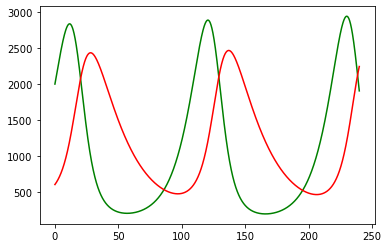

In [8]:
'''Modeling off of the Calculus in Context numbers (p. 61) and pseudocode (p. 69)'''

numberofsteps = 2400
t_initial = 0
t_final = 240 # measuring population growth within each month. 240 months = 20 years
Delta_t = (t_final - t_initial)/numberofsteps
t = t_initial


a = 0.1        # reproductive rate of hares
b = 0.005      # coefficient in rabbits/month/rabbit-fox, measures interaction between prey and predator
c = 0.00004    # coefficient in foxes/month/rabbit-fox, measures interaction and subsequent nourishment of maternal foxes that then bear offspring
d = 0.04       # coefficient of the death/starvation rate of foxes.
e = 10000      # logistical growth / bounded growth coefficient that won't be used here

H = 2000 # total susceptible people in population
L = 10  # total people currently infected


''' Initialize lists to then plot below, appending each new respective value in the loop '''

H_list = [H] #
L_list = [L*60] # multiply by 60 here to Create the scaled graph
t_list = [t]

'''We design a for loop that repeats for a number of segments. We iterate over 3 steps with each loop:
Step 1: We establish the rate change equations: H_prime and L_prime
'''

for step in range(numberofsteps):
    H_prime = (a * H) - (b * H * L)
    L_prime = (c * H * L) - (d * L) 
    #H_prime = ((a * H) * (1 - (H / e))) - (b * H * L) # logistic growth of hare population
    
    Delta_H = H_prime * Delta_t # Calculate the change in H and L from their rates of change.
    Delta_L = L_prime * Delta_t

    H = H + Delta_H
    L = L + Delta_L
    t = t + Delta_t
    H_list.append(H)
    L_list.append(L*60) # multiply by 60 here to Create the scaled graph
    t_list.append(t)

   


#Shortest Mathpllib tutorial ever.
#Just use this - you need to array the data each time as below - but really you don't need all the bells and whistles.

''' Graph of 7c '''
import matplotlib.pyplot as plt
plt.plot(t_list, H_list, 'g') # Graph of Rabbits (R)

plt.plot(t_list, L_list, 'r') # Graph of Lynxes (scaled 60L to fit the graphic and show the visual of the population in correlation with hares)


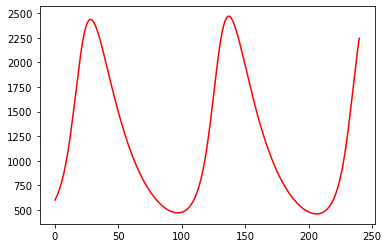

In [9]:
plt.plot(t_list, L_list, 'r') # Graph of Lynxes, within it's own scale

#### Graph: 8d,f (L(0) = 20)

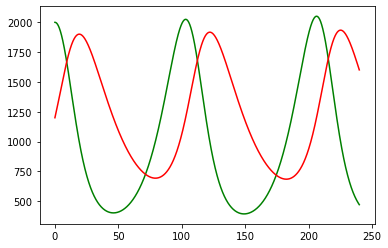

In [10]:
'''Modeling off of the Calculus in Context numbers (p. 61) and pseudocode (p. 69)'''

numberofsteps = 2400
t_initial = 0
t_final = 240 # measuring population growth within each month. 240 months = 20 years
Delta_t = (t_final - t_initial)/numberofsteps
t = t_initial


a = 0.1        # reproductive rate of hares
b = 0.005      # coefficient in rabbits/month/rabbit-fox, measures interaction between prey and predator
c = 0.00004    # coefficient in foxes/month/rabbit-fox, measures interaction and subsequent nourishment of maternal foxes that then bear offspring
d = 0.04       # coefficient of the death/starvation rate of foxes.
e = 10000      # logistical growth / bounded growth coefficient that won't be used here

H = 2000 # total susceptible people in population
L = 20  # total people currently infected


''' Initialize lists to then plot below, appending each new respective value in the loop '''

H_list = [H] #
L_list = [L*60] # multiply by 60 here to Create the scaled graph
t_list = [t]

'''We design a for loop that repeats for a number of segments. We iterate over 3 steps with each loop:
Step 1: We establish the rate change equations: H_prime and L_prime
'''

for step in range(numberofsteps):
    H_prime = (a * H) - (b * H * L)
    L_prime = (c * H * L) - (d * L) 
    #H_prime = ((a * H) * (1 - (H / e))) - (b * H * L) # logistic growth of hare population
    
    Delta_H = H_prime * Delta_t # Calculate the change in H and L from their rates of change.
    Delta_L = L_prime * Delta_t

    H = H + Delta_H
    L = L + Delta_L
    t = t + Delta_t
    H_list.append(H)
    L_list.append(L*60) # multiply by 60 here to Create the scaled graph
    t_list.append(t)

   


#Shortest Mathpllib tutorial ever.
#Just use this - you need to array the data each time as below - but really you don't need all the bells and whistles.

''' Graph of 7c '''
import matplotlib.pyplot as plt
plt.plot(t_list, H_list, 'g') # Graph of Rabbits (R)

plt.plot(t_list, L_list, 'r') # Graph of Lynxes (scaled 60L to fit the graphic and show the visual of the population in correlation with hares)


#### Graph: 8d, f (L(0) = 50)

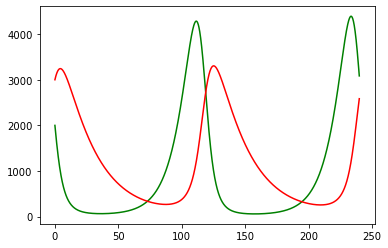

In [11]:
'''Modeling off of the Calculus in Context numbers (p. 61) and pseudocode (p. 69)'''

numberofsteps = 2400
t_initial = 0
t_final = 240 # measuring population growth within each month. 240 months = 20 years
Delta_t = (t_final - t_initial)/numberofsteps
t = t_initial


a = 0.1        # reproductive rate of hares
b = 0.005      # coefficient in rabbits/month/rabbit-fox, measures interaction between prey and predator
c = 0.00004    # coefficient in foxes/month/rabbit-fox, measures interaction and subsequent nourishment of maternal foxes that then bear offspring
d = 0.04       # coefficient of the death/starvation rate of foxes.
e = 10000      # logistical growth / bounded growth coefficient that won't be used here

H = 2000 # total susceptible people in population
L = 50  # total people currently infected


''' Initialize lists to then plot below, appending each new respective value in the loop '''

H_list = [H] #
L_list = [L*60] # multiply by 60 here to Create the scaled graph
t_list = [t]

'''We design a for loop that repeats for a number of segments. We iterate over 3 steps with each loop:
Step 1: We establish the rate change equations: H_prime and L_prime
'''

for step in range(numberofsteps):
    H_prime = (a * H) - (b * H * L)
    L_prime = (c * H * L) - (d * L) 
    #H_prime = ((a * H) * (1 - (H / e))) - (b * H * L) # logistic growth of hare population
    
    Delta_H = H_prime * Delta_t # Calculate the change in H and L from their rates of change.
    Delta_L = L_prime * Delta_t

    H = H + Delta_H
    L = L + Delta_L
    t = t + Delta_t
    H_list.append(H)
    L_list.append(L*60) # multiply by 60 here to Create the scaled graph
    t_list.append(t)

   


#Shortest Mathpllib tutorial ever.
#Just use this - you need to array the data each time as below - but really you don't need all the bells and whistles.

''' Graph of 7c '''
import matplotlib.pyplot as plt
plt.plot(t_list, H_list, 'g') # Graph of Rabbits (R)

plt.plot(t_list, L_list, 'r') # Graph of Lynxes (scaled 60L to fit the graphic and show the visual of the population in correlation with hares)


**Question 9:**
Chapter 4 explores additional models that can be explored using this method. 
Copy and paste SIR plot here and  modify to model the Fermentation Model from page 195 numbers 8/9/10/11. You do not need to answer the questions, just implement the model 
Answer all parts of  8/9/10/11 and implement the model.


**Q9 Answer**

    8a) 
    Y = 0.5 lbs of starting yeast
    a = 0.2 yeast per hour per yeast
    b = 10 lbs carrying capacity
    Assuming the yeast grows logistically and is not inhibited by alcohol:
    Y(t) = Y' = (a * Y) * (1 - (Y / b))
    
    8b)
    1/2 of the carrying capacity = 10/2 = 5.
    We reach half of the carrying capacity at about step 16, and 1% within carrying capacity would be as growth levels off, which is about step 32.
    
    8c)
    Because this yeast grows at half of the rate of the original yeast, it takes twice as long to get to half capacity and within 1% capacity.
    We would expect to see this yeast reach 1/2 capacity at about step 32, and within 1% at about step 64.
    
    
    9a)
    A = 0 lbs of starting alcohol
    c = 0.05 alcohol per hour per yeast
    Alcohol is made proportional to the amount of yeast available (as well as other resources not listed here).
    A(t) = A' = c * Y
    
    9b)
    Since the rise in alcohol becomes toxic to yeast, we now incorporate a death term into its differential equation.
    d = 0.1 lb of yeast per hour per yeast-alcohol
    The new equation would then be:
    Y(t) = Y' = (a * Y)*(1 - (Y / b)) - (d * Y * A)
    
    9c)
    The yeast gets about 3/10 of the way to carrying capacity. This makes sense, as the alcohol is already acting on the yeast as fermentation is happening concurrently while yeast dies. The yeast appears to peak at slightly above 3 lbs.
    Fermentation ends when the amount of yeast in the bottle reaches 0. This occurs at about hour 60. At this time, about 3.3 lbs of alcohol have been produced in the vat.
    
    
    10)
    Since the toxicity of alcohol is decreased 5-fold, alcohol is much less toxic to yeast. The yeast is also producing more alcohol at the same time. This flattens the curve for yeast and it dies more slowly over time, and it takes longer to reach 0 yeast in the vat.
    This model made me realize that realistically there should be a carrying capacity for the alcohol, too. Without it, ~ 17.5 lbs of alcohol would be produced -- much greater than the vat capacity.
    Cases:
    Only toxicity is reduced: More alcohol is produced, but is produced more slowly, and yeast is allowed to grow more in the vat -- almost twice as much from the normal model.
    Only alcohol produced is increased: Since more alcohol is produced, the alcohol kills the yeast much more quickly. We see about  ~ 1.6 lbs at peak, halved from the normal model.
    
    
    11a)
    e = 0.15 lbs of super per hour per lb yeast
    S(t) = S' = -e * Y
    Sugar is decreasing from the vat over time at a rate proportional to the amount of yeast in the vat.
    
    11b)
    Carry capacity, b, must change to accommodate the total amount of sugar:
    For S lbs of sugar, the vat can contain .4S lbs of yeast:
    b = .4S
    To maintain 10 lbs of yeast, 40 lbs of sugar must be in the vat: S = 40 lbs sugar.
    To maintain 1 lb of yeast: 4 lbs of sugar must be in the vat.
    The differential equation for yeast:
    Y(t) = Y' = (a * Y)*(1 - (Y/.4S)) - (d * Y * A)
    
    11c)
    For S = 25 lbs sugar, Y = 0.5 lbs yeast, A = 0:
    We lost ~ 10-12 lbs of sugar, and we produce about 3 lbs of alcohol, and yeast peaks at about 3 lbs also before declining.
    By the time fermentation ends, we have:
    S ~= 14 lbs
    A ~= 3 lbs

#### Question 9:  8b,c Model

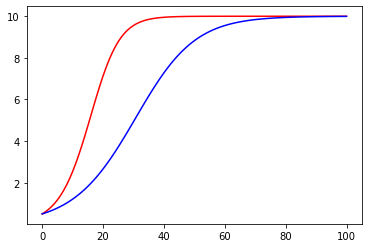

In [12]:
'''Modeling off of the Calculus in Context numbers (p. 61) and pseudocode (p. 69)'''

numberofsteps = 100
t_initial = 0
t_final = 100 # measuring population growth within each month. 240 months = 20 years
Delta_t = (t_final - t_initial)/numberofsteps
t = t_initial


a1 = 0.2        # growth rate yeast 1
a2 = 0.1        # growth rate yeast 2
e = 10          # carrying capacity

Y1 = 0.5 # starting lbs of yeast 1
Y2 = 0.5 # starting lbs of yeast 2


''' Initialize lists to then plot below, appending each new respective value in the loop '''

Y1_list = [Y1] #
Y2_list = [Y2]
t_list = [t]

'''We design a for loop that repeats for a number of segments. We iterate over 3 steps with each loop:
Step 1: We establish the rate change equations: H_prime and L_prime
'''

for step in range(numberofsteps):
    Y1_prime = ((a1 * Y1) * (1 - (Y1 / e)))
    Y2_prime = ((a2 * Y2) * (1 - (Y2 / e)))
    
    Delta_Y1 = Y1_prime * Delta_t # Calculate the change in H and L from their rates of change.
    Delta_Y2 = Y2_prime * Delta_t # Calculate the change in H and L from their rates of change.

    Y1 = Y1 + Delta_Y1
    Y2 = Y2 + Delta_Y2
    t = t + Delta_t
    Y1_list.append(Y1)
    Y2_list.append(Y2)
    t_list.append(t)

   


#Shortest Mathpllib tutorial ever.
#Just use this - you need to array the data each time as below - but really you don't need all the bells and whistles.

''' Graph of 7c '''
import matplotlib.pyplot as plt
plt.plot(t_list, Y1_list, 'r') # Graph of yeast 1

plt.plot(t_list, Y2_list, 'b') # Graph of yeast 2


#### Question 9: 9a, b, c model

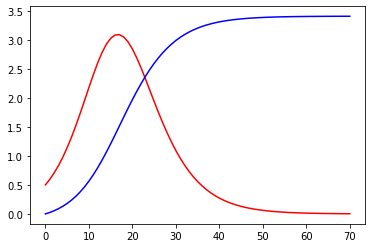

In [13]:
'''Modeling off of the Calculus in Context numbers (p. 61) and pseudocode (p. 69)'''

numberofsteps = 70
t_initial = 0
t_final = 70 # measuring population growth within each month. 240 months = 20 years
Delta_t = (t_final - t_initial)/numberofsteps
t = t_initial


a = 0.2        # growth rate yeast 1
b = 10         # carrying capacity of bottle
c = 0.05       # alcohol production per hour per lb yeast
d = 0.1        # death per hour per yeast-alcohol

Y = 0.5 # starting lbs of yeast 1
A = 0   # starting lbs of alcohol


''' Initialize lists to then plot below, appending each new respective value in the loop '''
Y_list = [Y] #
A_list = [A]
t_list = [t]

'''We design a for loop that repeats for a number of segments. We iterate over 3 steps with each loop:
Step 1: We establish the rate change equations: H_prime and L_prime
'''

for step in range(numberofsteps):
    Y_prime = (a * Y) * (1 - (Y / b)) - (d *Y* A)
    #Y_prime = ((a * Y) * (1 - (Y / b)))
    A_prime = (c * Y)
    
    Delta_Y = Y_prime * Delta_t # Calculate the change in H and L from their rates of change.
    Delta_A = A_prime * Delta_t # Calculate the change in H and L from their rates of change.

    Y = Y + Delta_Y
    A = A + Delta_A
    t = t + Delta_t
    Y_list.append(Y)
    A_list.append(A)
    t_list.append(t)

   


#Shortest Mathpllib tutorial ever.
#Just use this - you need to array the data each time as below - but really you don't need all the bells and whistles.

''' Graph of 7c '''
import matplotlib.pyplot as plt
plt.plot(t_list, Y_list, 'r') # Graph of yeast 1

plt.plot(t_list, A_list, 'b') # Graph of yeast 2


#### Question 9: 10 model

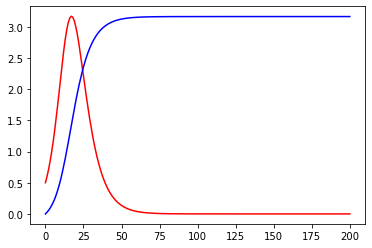

In [14]:
'''Modeling off of the Calculus in Context numbers (p. 61) and pseudocode (p. 69)'''

numberofsteps = 200
t_initial = 0
t_final = 200 # measuring population growth within each month. 240 months = 20 years
Delta_t = (t_final - t_initial)/numberofsteps
t = t_initial


a = 0.2        # growth rate yeast 1
b = 10         # carrying capacity of bottle
c = 0.05       # alcohol production per hour per lb yeast
d = 0.1       # death per hour per yeast-alcohol

Y = 0.5 # starting lbs of yeast 1
A = 0   # starting lbs of alcohol


''' Initialize lists to then plot below, appending each new respective value in the loop '''
Y_list = [Y] #
A_list = [A]
t_list = [t]

'''We design a for loop that repeats for a number of segments. We iterate over 3 steps with each loop:
Step 1: We establish the rate change equations: H_prime and L_prime
'''

for step in range(numberofsteps):
    Y_prime = (a * Y) * (1 - (Y / b)) - (d *Y* A)
    #Y_prime = ((a * Y) * (1 - (Y / b)))
    A_prime = (c * Y) * (1 - (A / b))
    
    Delta_Y = Y_prime * Delta_t # Calculate the change in H and L from their rates of change.
    Delta_A = A_prime * Delta_t # Calculate the change in H and L from their rates of change.

    Y = Y + Delta_Y
    A = A + Delta_A
    t = t + Delta_t
    Y_list.append(Y)
    A_list.append(A)
    t_list.append(t)

   


#Shortest Mathpllib tutorial ever.
#Just use this - you need to array the data each time as below - but really you don't need all the bells and whistles.

''' Graph of 7c '''
import matplotlib.pyplot as plt
plt.plot(t_list, Y_list, 'r') # Graph of yeast 1

plt.plot(t_list, A_list, 'b') # Graph of yeast 2


#### Question 9: 11a, b, c model

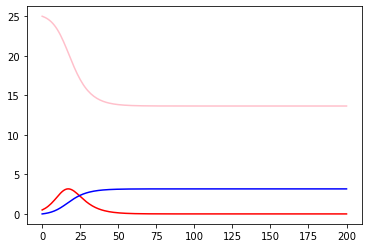

In [15]:
'''Modeling off of the Calculus in Context numbers (p. 61) and pseudocode (p. 69)'''

numberofsteps = 200
t_initial = 0
t_final = 200 # measuring population growth within each month. 240 months = 20 years
Delta_t = (t_final - t_initial)/numberofsteps
t = t_initial


Y = 0.5 # starting lbs of yeast 1
A = 0   # starting lbs of alcohol
S = 25

a = 0.2        # growth rate yeast 1
b = .4*S       # carrying capacity of vat, modified by the amount of sugar present
c = 0.05       # alcohol production per hour per lb yeast
d = 0.1        # death per hour per yeast-alcohol
e = 0.15       # sugar consumption per hour per lb yeast




''' Initialize lists to then plot below, appending each new respective value in the loop '''
Y_list = [Y] 
A_list = [A]
S_list = [S]
t_list = [t]

'''We design a for loop that repeats for a number of segments. We iterate over 3 steps with each loop:
Step 1: We establish the rate change equations: H_prime and L_prime
'''

for step in range(numberofsteps):
    Y_prime = (a * Y) * (1 - (Y / b)) - (d *Y* A)
    #Y_prime = ((a * Y) * (1 - (Y / b)))
    A_prime = (c * Y) * (1 - (A / 10))
    S_prime = -(e * Y)
    
    Delta_Y = Y_prime * Delta_t # Calculate the change in H and L from their rates of change.
    Delta_A = A_prime * Delta_t # Calculate the change in H and L from their rates of change.
    Delta_S = S_prime * Delta_t

    Y = Y + Delta_Y
    A = A + Delta_A
    S = S + Delta_S
    t = t + Delta_t
    Y_list.append(Y)
    A_list.append(A)
    S_list.append(S)
    t_list.append(t)

   


#Shortest Mathpllib tutorial ever.
#Just use this - you need to array the data each time as below - but really you don't need all the bells and whistles.

''' Graph of 7c '''
import matplotlib.pyplot as plt
plt.plot(t_list, Y_list, 'r') # Graph of yeast 1

plt.plot(t_list, A_list, 'b') # Graph of alcohol
plt.plot(t_list, S_list, 'pink') # Graph of sugar



**Question 10:** 

Create your own species (or other) SIR type model. 

Provide code and aa sample output.

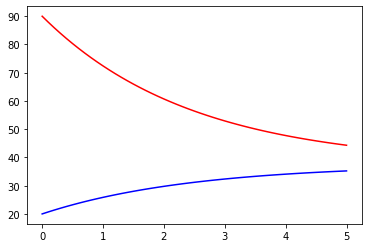

In [40]:
'''Modeling off of the Calculus in Context numbers (p. 61) and pseudocode (p. 69)'''
numberofsteps = 50 # number of data segments to keep track of. I.e. number of times to loop through status change steps.
t_initial = 0
t_final = 5
Delta_t = (t_final - t_initial)/numberofsteps
t = t_initial


k1 = 0.3 # coefficient for the rate of temp loss for coffee, determined experimentally by numerous factors as whether cream and sugar were added, whether the cup was stirred, the material, size, and shape of the mug, etc.
k2 = 0.1 # coefficient for the rate of temp gain for the air in the outer container


Q = 90  # starting coffee temperature
A = 20  # starting air temperature



''' Initialize lists to then plot below, appending each new respective value in the loop '''

Q_list = [Q]
A_list = [A]
t_list = [t]

'''We design a for loop that repeats for a number of segments. We iterate over 3 steps with each loop:
Step 1: We establish the rate change equations: S_prime, I_prime, R_prime.
'''

for step in range(numberofsteps): # we loop for the number of segments we wish to record
    Q_prime = -k1*(Q-A)
    A_prime = k2*(Q-A)
    
    ''' Step 2: Designing the for Loop, and calculating the changes in S, I, R as Delta_S, Delta_I, Delta_R, respectively.'''
    Delta_Q = Q_prime * Delta_t # Calculate the change in Q and A from their rates of change.
    Delta_A = A_prime * Delta_t

    

    ''' Step 3: Construct the changes in S, I, and R from their Deltas.'''
    Q = Q + Delta_Q
    A = A + Delta_A
    t = t + Delta_t # Don't forget to calculate the change in time
    Q_list.append(Q) # We then append to arrays to be plotted.
    A_list.append(A)
    t_list.append(t)

   


#Shortest Mathpllib tutorial ever.
#Just use this - you need to array the data each time as below - but really you don't need all the bells and whistles.

import matplotlib.pyplot as plt
plt.plot(t_list, Q_list, 'red') # coffee temperature

plt.plot(t_list, A_list, 'blue') # Air temperature graph


**Finally:**
    
What are some thoughts about modeling from this project? 
Which model was the simpliest?
Which expressed the underlying ideas best?
Which was good for a "snapshot" of the ideas?
As we use more packages for mathematical modelling do we sometimes loss track of the ideas?

It was interesting to see how rate equations/coupled differential equations are used to model cause-effect occurrences in industry and nature. 
The SIRPLOT was perhaps the simplest model as far as readability is concerned, and the packages used for differential equations and matrix the matrix model perhaps complicate the readability of the code. All in all, they all deliver the same result. The SIRPLOT felt it described the idea behind how the plots are made best because each step is explicit in its purpose for modeling population across time.